<b>Bu notebook'da renkli bir görüntüye sırası ile aşağıdaki işlemler uygulanmıştır.</b>

<br>1) Görüntüyü python ortamında okuyup açma
<br>2) Renkli görüntüyü gray scale'e çevirme
<br>3) Gray Scale görüntünün histogramını elde etme
<br>4) Farklı threashold değerleri ile gray scale görüntüyü binary görüntüye çevirme
<br>5) Renkli görüntüye gauss gürültüsü ekleme
<br>6) Gürültülü renkli görüntüleri gray scale'e çevirme
<br>7) Elde edilen gray scale görüntülerine düşük geçişli filtreler uygulama
<br>8) Elde edilen gray scale görüntülerine yüksek geçişli filtreler uygulama

Son adımda ise gürültülü bir başka görüntü incelenmiştir. Uygun filte yöntemi önerilip uygulanmıştır.

-------------------------------------------------------------------------------------------------------------------------------

<b>The following operations are applied to a colored image in this notebook, respectively.</b>

<br>1) Reading and opening image in python environment
<br>2) Converting a color image to gray scale
<br>3) Obtaining the histogram of the gray scale image
<br>4) Converting gray scale image to binary image with different threashold values
<br>5) Adding gaussian noise to the color image
<br>6) Converting noisy color images to gray scale
<br>7) Applying low-pass filters to the resulting gray scale images
<br>8) Applying high-pass filters to the resulting gray scale images

In the last step, another noisy image was examined. Appropriate filte method was proposed and applied.

  
 <br><i>Sumeyye C.</i>
 <br><i>26.04.2020</i>

<b>1) Reading and opening image in python environment</b>

In [62]:
#HW1

import cv2
import numpy as np
from matplotlib import pyplot as plt


image_name="SunnyLake.bmp" # image name

#read the image
img = cv2.imread(image_name) 


#show image
cv2.imshow('image',img)

#pressing any key to close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

<b>2) Converting a color image to gray scale</b>

In [63]:
# obtain gray scale image

#method-I: using the cvtColor function
grayImage1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray scale image (method-I)',grayImage1)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
#obtain gray scale image

#method-II: averaging the channels of R, G, B
def rgb_to_gray(img):
        grayImage = np.zeros(img.shape)
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])

        R = (R *.299)
        G = (G *.587)
        B = (B *.114)

        Avg = (R+G+B)
        grayImage = img

        for i in range(3):
           grayImage[:,:,i] = Avg

        return grayImage 


#function that converts to gray scale
grayImage2 = rgb_to_gray(img) 


cv2.imshow('gray scale image (method-II)',grayImage2)

cv2.waitKey(0)
cv2.destroyAllWindows()


<b>3) Obtaining the histogram of the Gray Scale image</b>

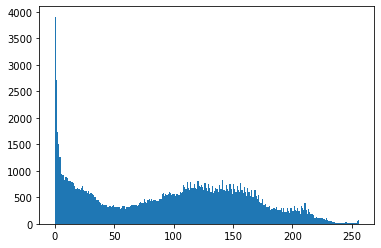

In [65]:
#obtaining histogram from gray scale image
plt.hist(grayImage1.ravel(),256,[0,256])
plt.show()

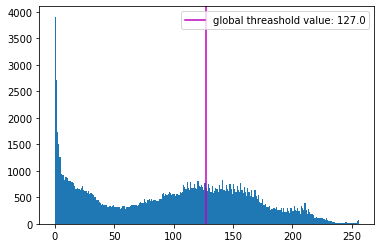

In [66]:
#global threashold application to gray scale image
globalThreasholdValue,globalThreasholdedImage = cv2.threshold(grayImage1,127,255,cv2.THRESH_BINARY)

plt.hist(grayImage1.ravel(),256,[0,256])

#displaying the global threashold value on the histogram
plt.axvline(globalThreasholdValue, 0, 5000, label='global threashold value: {}'.format(globalThreasholdValue), color="m")

plt.legend()

plt.show()


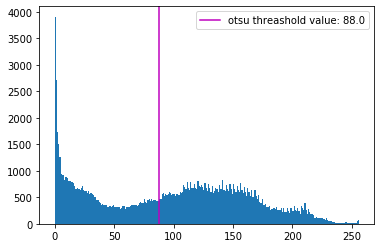

In [67]:
#otsu threashold application to gray scale image
otsuThreasholdValue,otsuThreasholdedImage = cv2.threshold(grayImage1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.hist(grayImage1.ravel(),256,[0,256])

#displaying the otsu threashold value on the histogram
plt.axvline(otsuThreasholdValue, 0, 5000, label='otsu threashold value: {}'.format(otsuThreasholdValue), color="m")

plt.legend()

plt.show()

<b>4) Converting gray scale image to binary image with different threashold values</b>

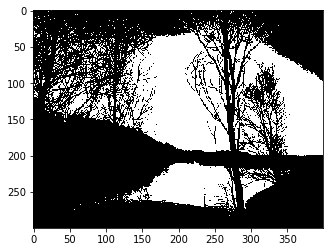

In [68]:
#to view the global threashold applied image

plt.imshow(globalThreasholdedImage, cmap='gray')
plt.show()

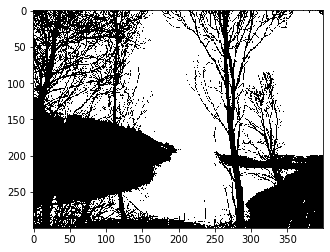

In [69]:
#to view the otsu threashold applied image

plt.imshow(otsuThreasholdedImage, cmap='gray')
plt.show()

<b>5) Adding gaussian noise to the color image</b>

In [70]:
#adding gaussian noise to the colored "SunnyLake" image

#read the image
img = cv2.imread(image_name)

def applyGaussNoise(standartDeviation):
    mean = 0

    #creating gaussian noise
    gaussian = np.random.normal(mean, standartDeviation, (img.shape[0],img.shape[1])) 

    noisy_image = np.zeros(img.shape, np.float32)

    if len(img.shape) == 2:
        noisy_image = img + gaussian
    else:
        #adding gauss noise to each channel separately
        noisy_image[:, :, 0] = img[:, :, 0] + gaussian
        noisy_image[:, :, 1] = img[:, :, 1] + gaussian
        noisy_image[:, :, 2] = img[:, :, 2] + gaussian

    #normalization of the noise-added image between 0 and 255
    cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    noisy_image = noisy_image.astype(np.uint8)
    
    return noisy_image
    



In [71]:
#zero mean and standart deviation=1

noisy_image1=applyGaussNoise(1)
cv2.imshow("image", img)
cv2.imshow("noisy image (mean=0, sigma=1)", noisy_image1)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [72]:
#zero mean and standart deviation=5

noisy_image2=applyGaussNoise(5)
cv2.imshow("image", img)
cv2.imshow("noisy image (mean=0, sigma=5)", noisy_image2)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [73]:
#zero mean and standart deviation=10

noisy_image3=applyGaussNoise(10)
cv2.imshow("image", img)
cv2.imshow("noisy image (mean=0, sigma=10)", noisy_image3)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [75]:
#zero mean and standart deviation=20

noisy_image4=applyGaussNoise(20)
cv2.imshow("image", img)
cv2.imshow("noisy image (mean=0, sigma=20)", noisy_image4)


cv2.waitKey(0)
cv2.destroyAllWindows()

<b>6) Converting noisy color images to gray scale</b>

In [76]:
#obtaining gray scale image by averaging the channels of R, G, B on noisy image

I_1 = cv2.cvtColor(noisy_image1, cv2.COLOR_BGR2GRAY)
cv2.imshow('I_1',I_1)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [77]:
I_5 = cv2.cvtColor(noisy_image2, cv2.COLOR_BGR2GRAY)
cv2.imshow('I_5',I_5)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [78]:
I_10 = cv2.cvtColor(noisy_image3, cv2.COLOR_BGR2GRAY)
cv2.imshow('I_10',I_10)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [79]:
I_20 = cv2.cvtColor(noisy_image4, cv2.COLOR_BGR2GRAY)
cv2.imshow('I_20',I_20)

cv2.waitKey(0)
cv2.destroyAllWindows()

<b>7) Applying low-pass filters to the resulting gray scale images</b>

In [36]:
#low pass filter application

#creating a low pass 3x3 filter kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

print(kernel_3x3)


[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


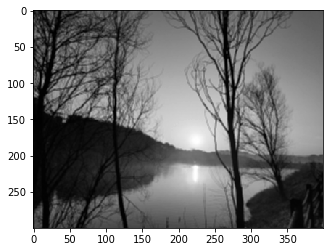

In [37]:
#3x3 low pass filter application on I_1

output = cv2.filter2D(I_1, -1, kernel_3x3)
plt.imshow(output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()


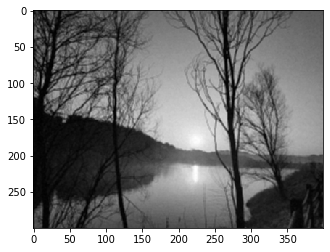

In [38]:
#3x3 low pass filter application on I_5

output = cv2.filter2D(I_5, -1, kernel_3x3)
plt.imshow(output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

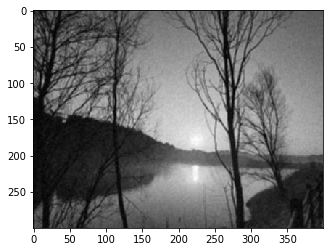

In [39]:
#3x3 low pass filter application on I_10

output = cv2.filter2D(I_10, -1, kernel_3x3)
plt.imshow(output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

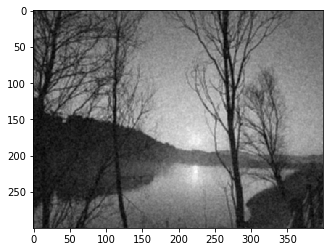

In [40]:
#3x3 low pass filter application on I_20

output = cv2.filter2D(I_20, -1, kernel_3x3)
plt.imshow(output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

In [41]:
#creating a low pass 5x5 filter kernel

kernel_5x5=np.ones((5,5), np.float32) / 25

print(kernel_5x5)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


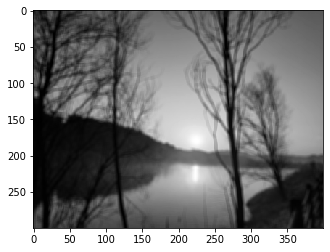

In [42]:
#5x5 low pass filter application on I_1

output = cv2.filter2D(I_1, -1, kernel_5x5)
plt.imshow(output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

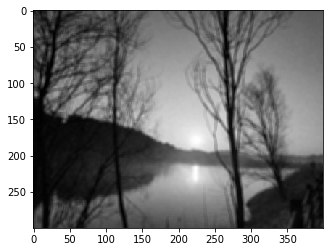

In [43]:
#5x5 low pass filter application on I_5

output = cv2.filter2D(I_5, -1, kernel_5x5)
plt.imshow(output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

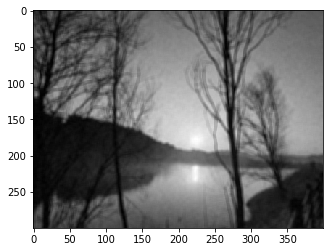

In [44]:
#5x5 low pass filter application on I_10

output = cv2.filter2D(I_10, -1, kernel_5x5)
plt.imshow(output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

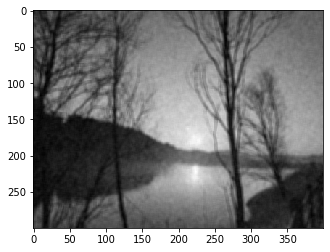

In [45]:
#5x5 low pass filter application on I_20

output = cv2.filter2D(I_20, -1, kernel_5x5)
plt.imshow(output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

<b>8) Applying high-pass filters to the resulting gray scale images</b>

In [46]:
#high pass filter application

#creating a high pass 3x3 filter kernel

kernel_3x3 = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

print(kernel_3x3)


[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


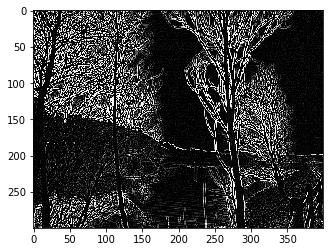

In [47]:
#3x3 high pass filter application on I_1

high_pass_output=cv2.filter2D(I_1,-1,kernel_3x3)
plt.imshow(high_pass_output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()


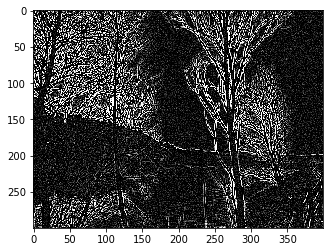

In [48]:
#3x3 high pass filter application on I_5

high_pass_output=cv2.filter2D(I_5,-1,kernel_3x3)
plt.imshow(high_pass_output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()


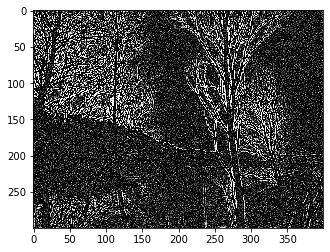

In [49]:
#3x3 high pass filter application on I_10

high_pass_output=cv2.filter2D(I_10,-1,kernel_3x3)
plt.imshow(high_pass_output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()


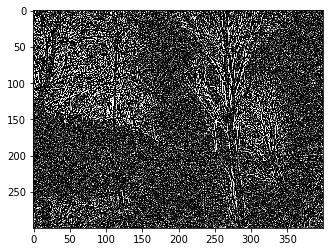

In [50]:
#3x3 high pass filter application on I_20

high_pass_output=cv2.filter2D(I_20,-1,kernel_3x3)
plt.imshow(high_pass_output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()


In [51]:
#creating a high pass 5x5 filter kernel

kernel_5x5= np.array([[-1, -1, -1, -1, -1],
                   [-1,  1,  2,  1, -1],
                   [-1,  2,  4,  2, -1],
                   [-1,  1,  2,  1, -1],
                   [-1, -1, -1, -1, -1]])

print(kernel_5x5)

[[-1 -1 -1 -1 -1]
 [-1  1  2  1 -1]
 [-1  2  4  2 -1]
 [-1  1  2  1 -1]
 [-1 -1 -1 -1 -1]]


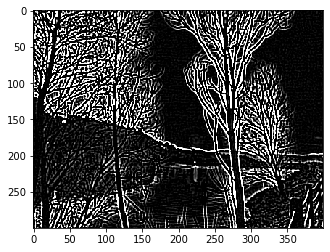

In [52]:
#5x5 high pass filter application on I_1

high_pass_output=cv2.filter2D(I_1,-1,kernel_5x5)
plt.imshow(high_pass_output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()


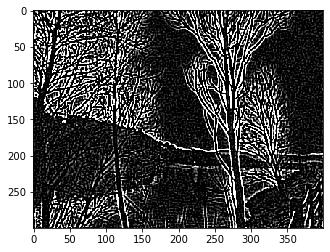

In [53]:
#5x5 high pass filter application on I_5

high_pass_output=cv2.filter2D(I_5,-1,kernel_5x5)
plt.imshow(high_pass_output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()


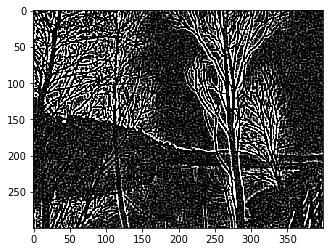

In [54]:
#5x5 high pass filter application on I_10

high_pass_output=cv2.filter2D(I_10,-1,kernel_5x5)
plt.imshow(high_pass_output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()


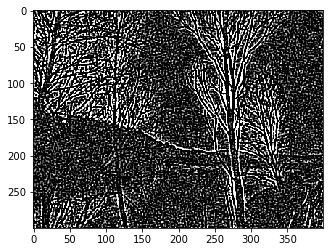

In [55]:
#5x5 high pass filter application on I_20

high_pass_output=cv2.filter2D(I_20,-1,kernel_5x5)
plt.imshow(high_pass_output, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()


<b>Cleaning the noise of another noisy image</b>

We clean the image with salt and pepper noise using the median filter.

In [80]:
#cleaning the noise of figure 1

image_name="Figure_1.png" # image name

figure1 = cv2.imread(image_name) # read image

#by giving the kernel 3, we say it looks at the 3x3 region
deNoisedFigue1=cv2.medianBlur(figure1, 3)

#show the image
cv2.imshow("Figure1", figure1)

#show de-noised image
cv2.imshow("de-noised Figure1", deNoisedFigue1)


#pressing any key to close the window
cv2.waitKey(0)
cv2.destroyAllWindows()
